# Optimal feeding hour

An implementastion of the optimal feeding hour window by a histogram-based method.
https://aquabyte.atlassian.net/wiki/spaces/Research/pages/950535038/1+16+21+-+Optimal+Feeding+Hours

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def estimate_feeding_hour(hour_array):
    """
    Find the contiguous set of hours where the count in that hour is greater than
    total count/ 18 starting a search at hour 10 between hours 3 and 20 inclusive
    
    @param hour_array - Array of hour in integer
    
    @returns start, end hour (inclusive)
    """
    counts = np.bincount(hour_array, minlength=24)
    
    # truncate data to hour 3..20
    counts[:3] = 0
    counts[21:] = 0
    
    pct = counts / counts.sum()
    threshold = 1/18
    
    for i in range(10, len(pct)):
        if pct[i] >= threshold:
            break
    for j in range(i, len(pct)):
        if pct[j] < threshold:
            break
    else:
        # python for loop ends with j = 23. Bump it.
        j = 24

    return i, j-1

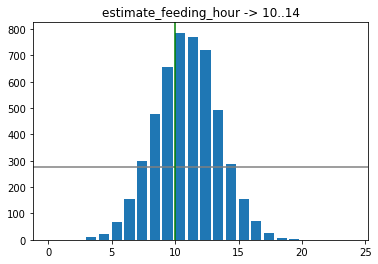

In [3]:
# Testing

# synthetic data
a = np.random.normal(11, scale=2.5, size=5000)
a = a.clip(0,24).astype(int)

start, end = estimate_feeding_hour(a)

# visualize
counts = np.bincount(a, minlength=24)
threshold = counts[3:21].sum() / 18
plt.hist(a, bins=24, range=(0,24), width=0.8)
plt.axhline(threshold, c='grey')
plt.axvline(10, c='green')
plt.title(f'estimate_feeding_hour -> {start}..{end}');

In [7]:
# real data
counts = np.array([  61, 78, 70, 59, 59, 76, 113, 63,  293, 1150, 1511, 1151,  847,  564, 314,  111,  146,  107,   57,   60,   84,   78,  103,  117])
c = []
for i in range(24):
    c.extend([i]*counts[i])
a = np.array(c)

In [ ]:
start, end = estimate_feeding_hour(a)

# visualize
counts = np.bincount(a)
threshold = counts[3:21].sum() / 18
plt.hist(a, bins=24, range=(0,24), width=0.8)
plt.axhline(threshold, c='grey')
plt.axvline(10, c='green')
plt.title(f'estimate_feeding_hour -> {start}..{end}');